In [1]:
# 载入必要的包
import numpy as np
import torch
from matplotlib import pyplot as plt
import math

In [2]:
# 代码3-1
def obj_func(x1, x2):
    return(0.1 * x1 * x1 + 3 * x2 * x2)
def GD_func(x1, x2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 6 * x2)

x1, x2 = -4, -2
eta = 0.4
output = [(x1, x2)]

for i in range(30):
    x1, x2, = GD_func(x1, x2)
    output.append((x1, x2))

Text(0, 0.5, 'x2')

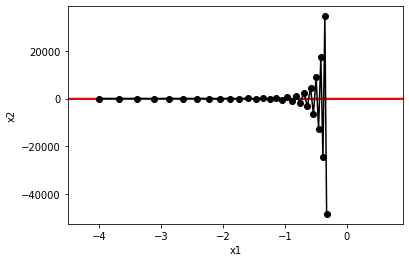

In [3]:
plt.plot(*zip(*output), '-o', color='black')
x1, x2 = np.meshgrid(np.arange(-4.5, 1.0, 0.1), np.arange(-2.0, 1.0, 0.1))
plt.contour(x1, x2, obj_func(x1, x2), colors='red')
plt.xlabel('x1')
plt.ylabel('x2')

In [4]:
# 代码3-2
def momentum_func(x1, x2, v1, v2):
    v1 = gamma * v1 + eta * 0.2 * x1  #一阶导
    v2 = gamma * v2 + eta * 6 * x2    #一阶导
    return x1 - v1, x2 - v2, v1, v2

gamma, x1, x2, v1, v2 = 0.4, -4, -2, 0, 0
output = [(x1, x2)]

for i in range(30):
    x1, x2, v1, v2 = momentum_func(x1, x2, v1, v2)
    output.append((x1, x2))

Text(0, 0.5, 'x2')

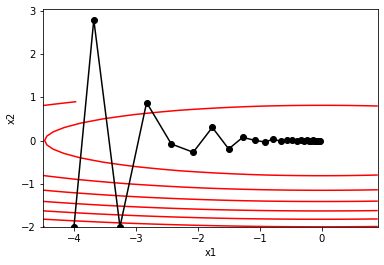

In [5]:
plt.plot(*zip(*output), '-o', color='black')
x1, x2 = np.meshgrid(np.arange(-4.5, 1.0, 0.1), np.arange(-2.0, 1.0, 0.1))
plt.contour(x1, x2, obj_func(x1, x2), colors='red')
plt.xlabel('x1')
plt.ylabel('x2')

In [6]:
# 代码3-3
def adagrad_func(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 6 * x2, 1e-6  # 前两项为自变量梯度
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

x1, x2, s1, s2 = -4, -2, 0, 0

output = [(x1, x2)]
for i in range(30):
    x1, x2, s1, s2 = adagrad_func(x1, x2, s1, s2)
    output.append((x1, x2))

Text(0, 0.5, 'x2')

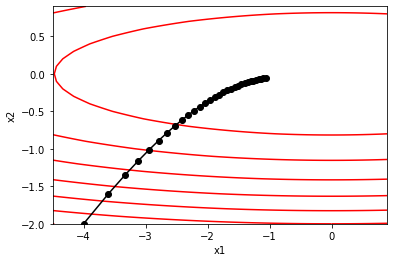

In [7]:
plt.plot(*zip(*output), '-o', color='black')
x1, x2 = np.meshgrid(np.arange(-4.5, 1.0, 0.1), np.arange(-2.0, 1.0, 0.1))
plt.contour(x1, x2,obj_func(x1,x2), colors='red')
plt.xlabel('x1')
plt.ylabel('x2')

In [9]:
# 代码3-4
def rmsprop_func(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 6 * x2, 1e-6
    s1 = beta * s1 + (1 - beta) * g1 ** 2
    s2 = beta * s2 + (1 - beta) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

beta, x1, x2, s1, s2 = 0.9, -4, -2, 0, 0

output = [(x1, x2)]
for i in range(30):
    x1, x2, s1, s2 = rmsprop_func(x1, x2, s1, s2)
    output.append((x1, x2))

Text(0, 0.5, 'x2')

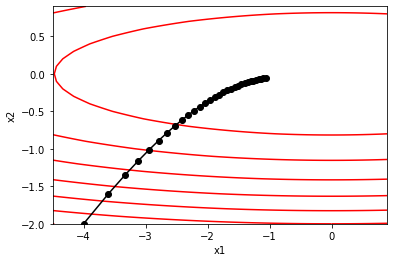

In [8]:
plt.plot(*zip(*output), '-o', color='black')
x1, x2 = np.meshgrid(np.arange(-4.5, 1.0, 0.1), np.arange(-2.0, 1.0, 0.1))
plt.contour(x1, x2,obj_func(x1,x2), colors='red')
plt.xlabel('x1')
plt.ylabel('x2')

In [9]:
# 代码3-5
def adam_func(x1, x2, v1, v2, s1, s2, t):
    g1, g2, eps = 0.2 * x1, 6 * x2, 1e-6
    v1 = beta1 * v1 + (1 - beta1) * g1
    v1_bias_corr = v1/(1-beta1**t)
    s1 = beta2 * s1 + (1 - beta2) * g1 ** 2
    s1_bias_corr = s1/(1-beta2**t)
    x1 -= eta* v1_bias_corr /(math.sqrt(s1_bias_corr+eps))
    v2 = beta1 * v2 + (1 - beta1) * g2
    v2_bias_corr = v2/(1-beta1**t)
    s2 = beta2 * s2 + (1 - beta2) * g2 ** 2
    s2_bias_corr = s2/(1-beta2**t)
    x2 -= eta* v2_bias_corr /(math.sqrt(s2_bias_corr+eps))
    t += 1
    return x1, x2, v1, v2, s1, s2, t

beta1, beta2, x1, x2, s1, s2, v1, v2, t = 0.9, 0.999, -4, -2, 0, 0, 0, 0, 1  # x1，x2是起始点坐标 
output = [(x1, x2)]
for i in range(30):
    x1, x2, s1, s2, v1, v2, t = adam_func(x1, x2, s1, s2, v1, v2, t)
    output.append((x1, x2))

Text(0, 0.5, 'x2')

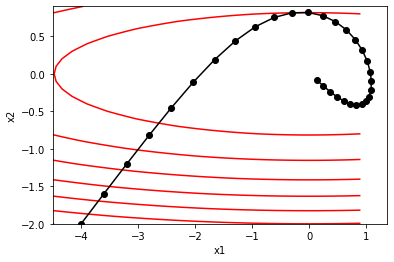

In [10]:
plt.plot(*zip(*output), '-o', color='black')
x1, x2 = np.meshgrid(np.arange(-4.5, 1.0, 0.1), np.arange(-2.0, 1.0, 0.1))
plt.contour(x1, x2, obj_func(x1, x2), colors='red')
plt.xlabel('x1')
plt.ylabel('x2')